In [1]:
# import library
import pandas as pd
import re
import sqlite3 as sq
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('DATA/train_preprocess.tsv.txt', sep='\t', names=['Tweet','Label'])
df.head()

,Tweet,Label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [3]:
# sortir label tweet
sorted(df['Label'].unique())

['negative', 'neutral', 'positive']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   11000 non-null  object
 1   Label   11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB


In [5]:
df.shape

(11000, 2)

In [6]:
# mengecek missing values
df.isna().sum()

Tweet    0
Label    0
dtype: int64

In [7]:
# mengecek data duplikat
df.duplicated().sum()

67

In [8]:
# menghapus data yang duplikat
df = df.drop_duplicates()

In [9]:
# mengecek kembali data duplikat
df.duplicated().sum()

0

In [10]:
df.shape

(10933, 2)

In [11]:
# menghitung value dari label
df.Label.value_counts()

Label
positive    6383
negative    3412
neutral     1138
Name: count, dtype: int64

<Axes: ylabel='Label'>

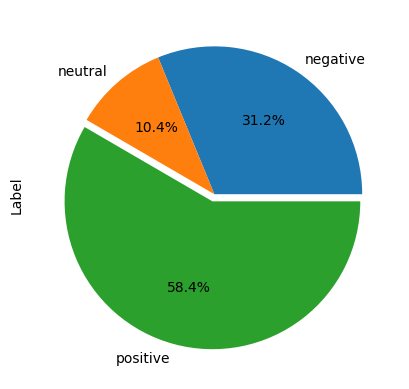

In [12]:
# data visualisasi
explode = [0, 0, 0.05]
presentase_sentiment = df.groupby("Label").Label.count()
presentase_sentiment.plot(kind = 'pie', autopct = '%1.1f%%', explode = explode)

In [13]:
# membuat kolom baru total word
df['Total Word'] = df['Tweet'].apply(lambda word: len(word.split()))
df

,Tweet,Label,Total Word
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38
...,...,...,...
10993,f - demokrat dorong upaya kemandirian energi n...,neutral,8
10994,tidak bosan,positive,2
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,26
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,13


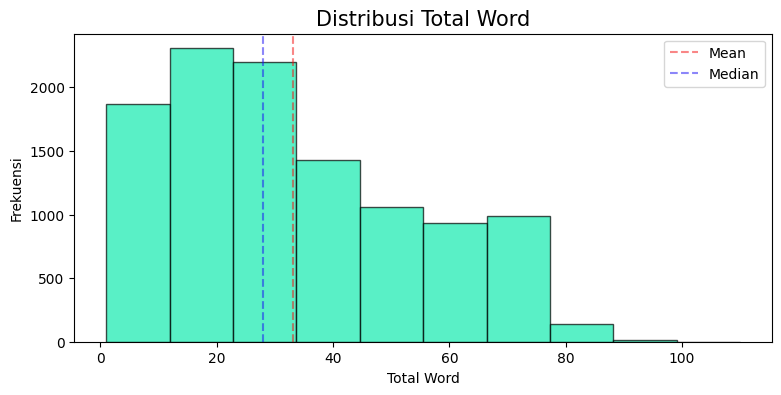

In [14]:
# data visualisasi
# palet warna
color = '#13ebaf'

# histogram
fig = plt.figure(figsize=(9, 4))
plt.hist(df['Total Word'], color=color, edgecolor='black', alpha=0.7)

# garis vertikal mean dan median
plt.axvline(x=df['Total Word'].mean(), ls='--', color='#f50f0f', alpha=0.5, label='Mean')
plt.axvline(x=df['Total Word'].median(), ls='--', color='#1a0ff5', alpha=0.5, label='Median')

# judul dan label
plt.title('Distribusi Total Word', size=15)
plt.xlabel('Total Word')
plt.ylabel('Frekuensi')

# tampilkan legend
plt.legend()

# tampilkan histogram
plt.show()

In [15]:
df['Total Word'].mean()

33.060550626543495

In [16]:
df["Total Word"].median()

28.0

In [17]:
# menghapus kolom total word
df = df.drop('Total Word', axis=1)

In [18]:
# mengubah ke huruf kecil
def lowercase(text):
    return text.lower()

In [19]:
# remove punctuation
def remove_punctuation(text):
    text = re.sub(r'(?:\@|http?\://|https?\://|www)\S+', '', text) #menghapus https dan http
    text = re.sub('<.*?>', ' ', text) #mengganti karakter html dengan tanda petik
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) #menghilangkan semua karakter yang bukan huruf atau angka dan menggantinya dengan spasi.
    text = re.sub('\n',' ',text) #mengganti line baru dengan spasi
    text = re.sub(r':', ' ', text) #menggantikan karakter : dengan spasi 
    text = re.sub('gue','saya', text) # Mengganti kata "gue" dengan kata "saya"
    text = re.sub(r'\b[a-zA-Z]\b', ' ', text) #menghapus single char
    text = ' '.join(text.split()) #memisahkan dan menggabungkan kata
    text = text.strip() #menghilangkan whitespace di awal dan di akhir teks
    text = re.sub(r'pic.twitter.com.[\w]+', '', text) #menghapus link picture
    text = re.sub(r'\buser\b',' ', text) #menghapus kata 'user'
    text = re.sub(r'\brt\b',' ', text) #menghapus awalan rt
    text = re.sub('RT',' ', text) #menghapus RT simbol
    text = re.sub(r'‚Ä¶', '', text)
    return text

In [20]:
# membuat database
conn = sq.connect('database_pl.db')

In [21]:
# import kamusalay
df_kamusalay = pd.read_csv('DATA/new_kamusalay.csv', encoding='latin-1', names=['alay','normal'])

In [22]:
df_kamusalay.to_sql('kamusalay', conn, if_exists='replace', index=False)
df_kamusalay = pd.DataFrame(df_kamusalay)
df_kamusalay

,alay,normal
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [24]:
db = sq.connect('database_pl.db', check_same_thread= False)
q_kamusalay = 'SELECT * FROM kamusalay'
t_kamusalay = pd.read_sql_query(q_kamusalay, db)

In [25]:
alay_dict = dict(zip(t_kamusalay['alay'], t_kamusalay['normal']))
def alay_to_normal(s):
    for word in alay_dict:
        return ' '.join([alay_dict[word] if word in alay_dict else word for word in s.split(' ')])

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

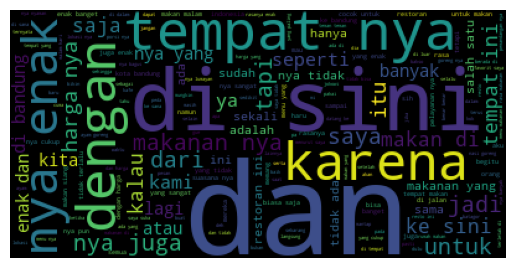

In [27]:
text = ' '.join(df['Tweet'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [47]:
df = pd.read_csv("clean_tweet.csv", encoding="latin-1", usecols=['new_tweet'])
df

,new_tweet
0,di saat semua cowok berusaha melacak perhatian...
1,user user siapa yang telat memberi tau kamu ...
2,41 kadang aku berpikir kenapa aku tetap percay...
3,user user aku itu aku nku tau matamu sipit tap...
4,user user kaum cebong kafir sudah kelihatan do...
...,...
13164,user jangan asal berbicara ndasmu congor kamu ...
13165,user kasur mana enak kunyuk
13166,user hati hati bisu lagi bosan duh xf0 x9f x98...
13167,user user user user bom yang real mudah terdet...


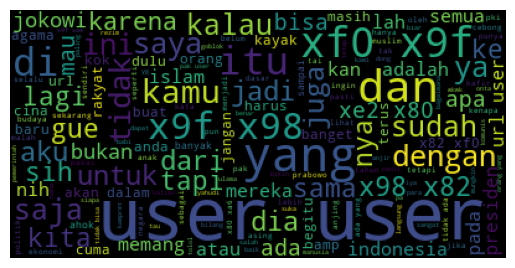

In [45]:
text = ' '.join(df['new_tweet'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [41]:
pwd

'c:\\Users\\LENOVO\\Documents\\Binar_DSC\\Python\\PlatinumChallange-Group2-'

In [48]:
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(new_tweet):
    return word_tokenize(new_tweet)

df['Remove_stopwords'] = df['new_tweet'].apply(word_tokenize_wrapper)
df

,new_tweet,Remove_stopwords
0,di saat semua cowok berusaha melacak perhatian...,"[di, saat, semua, cowok, berusaha, melacak, pe..."
1,user user siapa yang telat memberi tau kamu ...,"[user, user, siapa, yang, telat, memberi, tau,..."
2,41 kadang aku berpikir kenapa aku tetap percay...,"[41, kadang, aku, berpikir, kenapa, aku, tetap..."
3,user user aku itu aku nku tau matamu sipit tap...,"[user, user, aku, itu, aku, nku, tau, matamu, ..."
4,user user kaum cebong kafir sudah kelihatan do...,"[user, user, kaum, cebong, kafir, sudah, kelih..."
...,...,...
13164,user jangan asal berbicara ndasmu congor kamu ...,"[user, jangan, asal, berbicara, ndasmu, congor..."
13165,user kasur mana enak kunyuk,"[user, kasur, mana, enak, kunyuk]"
13166,user hati hati bisu lagi bosan duh xf0 x9f x98...,"[user, hati, hati, bisu, lagi, bosan, duh, xf0..."
13167,user user user user bom yang real mudah terdet...,"[user, user, user, user, bom, yang, real, muda..."


In [54]:
# Ref https://yunusmuhammad007.medium.com/text-preprocessing-menggunakan-pandas-nltk-dan-sastrawi-untuk-large-dataset-5fb3c0a88571
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "url", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 'user',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'USER', 'x9f', 'x98', 'xf0','RT', 'URL', 'xe2','x80','x82','xa6','dr','yg','yang'
                       'xf0','x98','x9f'])


# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df["text_remove_stopwords"]= df['Remove_stopwords'].apply(stopwords_removal)

df["text_remove_stopwords"]=df["text_remove_stopwords"].str.join(sep=" ")

df

,new_tweet,Remove_stopwords,text_remove_stopwords
0,di saat semua cowok berusaha melacak perhatian...,"[di, saat, semua, cowok, berusaha, melacak, pe...",cowok berusaha melacak perhatian lantas remehk...
1,user user siapa yang telat memberi tau kamu ...,"[user, user, siapa, yang, telat, memberi, tau,...",telat edan sarap bergaul cigax jifla calis licew
2,41 kadang aku berpikir kenapa aku tetap percay...,"[41, kadang, aku, berpikir, kenapa, aku, tetap...",41 kadang berpikir percaya tuhan jatuh berkali...
3,user user aku itu aku nku tau matamu sipit tap...,"[user, user, aku, itu, aku, nku, tau, matamu, ...",nku matamu sipit diliat
4,user user kaum cebong kafir sudah kelihatan do...,"[user, user, kaum, cebong, kafir, sudah, kelih...",kaum cebong kafir dongoknya dungu haha
...,...,...,...
13164,user jangan asal berbicara ndasmu congor kamu ...,"[user, jangan, asal, berbicara, ndasmu, congor...",berbicara ndasmu congor sekata anjing
13165,user kasur mana enak kunyuk,"[user, kasur, mana, enak, kunyuk]",kasur enak kunyuk
13166,user hati hati bisu lagi bosan duh xf0 x9f x98...,"[user, hati, hati, bisu, lagi, bosan, duh, xf0...",hati hati bisu bosan duh xaa
13167,user user user user bom yang real mudah terdet...,"[user, user, user, user, bom, yang, real, muda...",bom real mudah terdeteksi bom terkubur dahsyat...


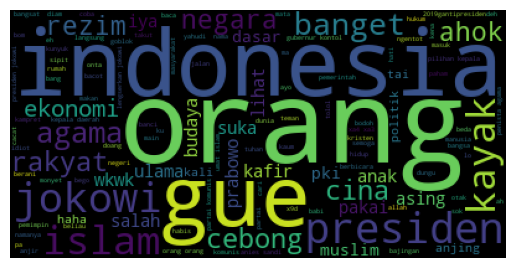

In [55]:
text = ' '.join(df['text_remove_stopwords'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()